In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Otros objetivos
# -----------------------------------------------------------------------
import sys
import os

# Ruta relativa desde notebooks/1-Preprocesing/ a src/
src_path = "../src/"
sys.path.append(src_path)

import support_modeling as sp  

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Para realizar la clasificación y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df=pd.read_csv("../results/data_encoded.csv")
df.head()

,is_fraudulent,amount_minmax,customer_age_minmax,card_type_Discover,card_type_MasterCard,card_type_Visa,purchase_category_Groceries,purchase_category_Online Shopping,purchase_category_Restaurant,purchase_category_Retail,purchase_category_Travel
0,0,0.575423,0.480769,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.189301,0.826923,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,0.123960,0.750000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.761671,0.788462,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0.188153,0.346154,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
df["is_fraudulent"]=df["is_fraudulent"].astype(float)

In [4]:
variable_dependiente="is_fraudulent"
modelo = sp.AnalisisModelosClasificacion(df, variable_dependiente)

In [5]:
modelo_elegido="random_forest"

In [6]:
logistic_regression_model=modelo.ajustar_modelo(modelo_elegido)

C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
453 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-

In [7]:
modelo.calcular_metricas(modelo_elegido)

,train,test
accuracy,0.863312,0.504505
precision,0.863311,0.504582
recall,0.863312,0.504505
f1,0.863312,0.504539
kappa,0.726593,0.008492
auc,0.943983,0.520409


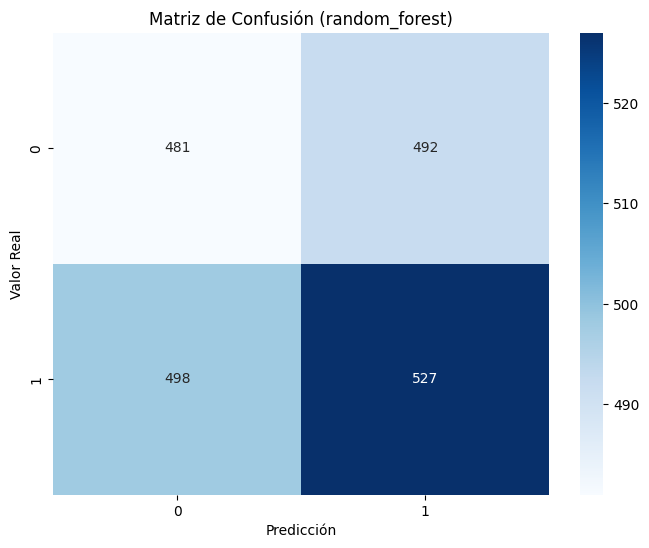

In [8]:
modelo.plot_matriz_confusion(modelo_elegido)

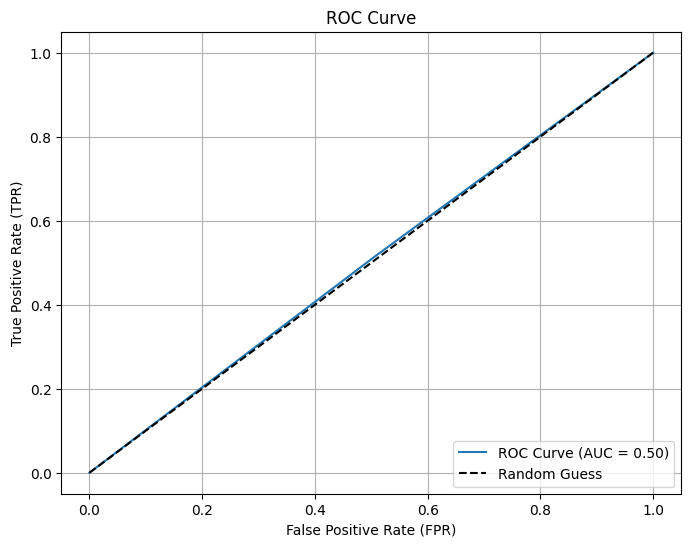

In [9]:
modelo.hacer_roc_curve(modelo_elegido)

c:\Users\alexc\Desktop\GIT\9.Regression_modeling_II\notebooks\../src\support_modeling.py:213: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importancia_df, palette="viridis")


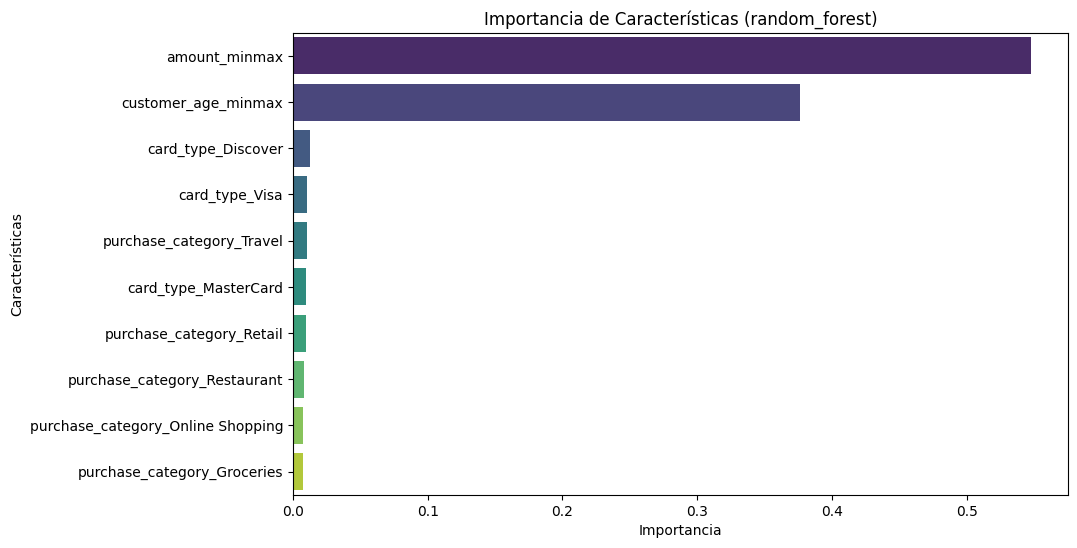

In [10]:
modelo.importancia_predictores(modelo_elegido)